# End-to-End Multi-class Dog Breed Classification

A Project work of mine to build an end-to-end multi-class image classifier using TensorFlow

## 1. Problem
Identifying the breed of a dog given an  image of the dog.

## 2. Data
The data was gotten from Kaggle: https://www.kaggle.com/competitions/dog-breed-identification/data

## 3. Evaluation
The evaluation is a file with prediction probabilites for each doog breed of each test image.

https://www.kaggle.com/competitions/dog-breed-identification/overview/evaluation

## 4. Features
Some information about the data:
* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
* There are 120 breeds of dogs (this means there are 120 different classes).
* There are around 10K+ images in the training set(these images have labels)
* There are around 10K+ images in the test set(these images have no labels, cause we have to predict them).

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

In [3]:
print('TF Version: ', tf.__version__)
print('TF Version: ', hub.__version__)
print("GPU", "available (YESSS!!!!!!!)" if tf.config.list_logical_devices("GPU") else "not available :(")

TF Version:  2.8.2
TF Version:  0.12.0
GPU available (YESSS!!!!!!!)


## Importing the Dataset

In [4]:
labels = pd.read_csv('drive/MyDrive/Data Science Project/Dog_breed/labels.csv')
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [5]:
labels.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


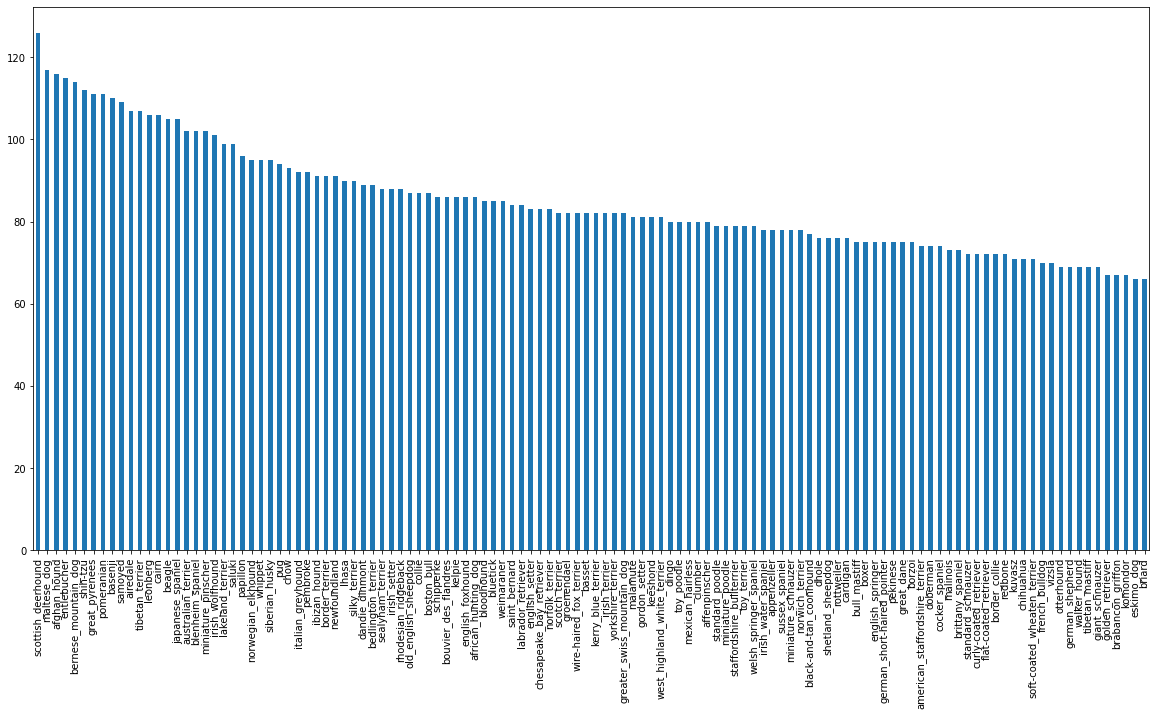

In [6]:
labels['breed'].value_counts().plot.bar(figsize=(20, 10));

In [7]:
# The median number of images per class?
labels['breed'].value_counts().median()

82.0

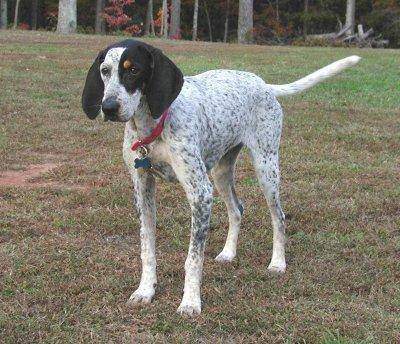

In [8]:
from IPython.display import Image
Image('drive/MyDrive/Data Science Project/Dog_breed/train/00214f311d5d2247d5dfe4fe24b2303d.jpg')

In [9]:
# Creating pathnames from Image ID's
filenames = ["drive/MyDrive/Data Science Project/Dog_breed/train/" + fname + ".jpg" for fname in labels['id']]

filenames[:10]

['drive/MyDrive/Data Science Project/Dog_breed/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Data Science Project/Dog_breed/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Data Science Project/Dog_breed/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Data Science Project/Dog_breed/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Data Science Project/Dog_breed/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Data Science Project/Dog_breed/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Data Science Project/Dog_breed/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Data Science Project/Dog_breed/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Data Science Project/Dog_breed/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Data Science Project/Dog_breed/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [10]:
import os
if len(os.listdir("drive/MyDrive/Data Science Project/Dog_breed/train/")) == len(filenames):
  print('Filenames match actual amount of files!!! Proceed.')
else:
  print('Filenames do not match actual amount of files, check the target directory.')

Filenames match actual amount of files!!! Proceed.


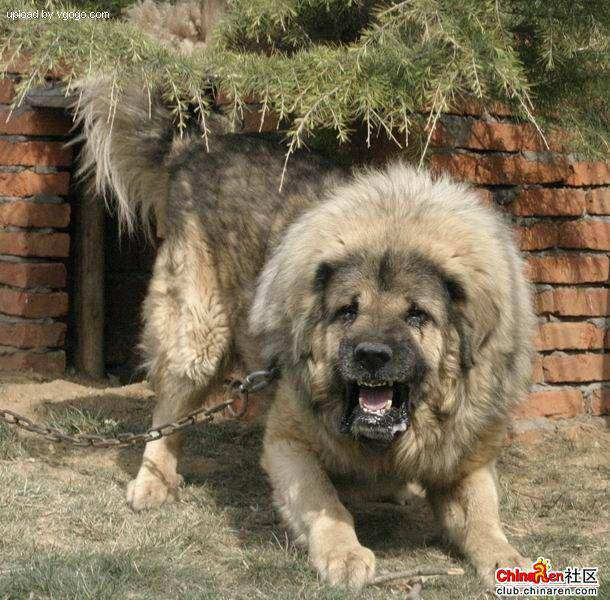

In [11]:
Image(filenames[9000])

In [12]:
label = labels['breed'].to_numpy()
label

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [13]:
len(label)

10222

In [14]:
# Checking if number of labels match the number of filenames
if len(label) == len(filenames):
  print('Good to go!')
else:
  print('Number of labels does not match number of filenames, check data directories!')

Good to go!


In [15]:
# Find the unique label values
unique_breeds = np.unique(label)
len(unique_breeds)

120

In [16]:
# Turn every label into a boolean array
boolean_labels = [lab == unique_breeds for lab in label]
boolean_labels[:3] 

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [17]:
len(boolean_labels)

10222

### Creating validation set

In [18]:
X = filenames
y = boolean_labels

We're going to start off experimenting with ~1000 images and increase as needed

In [19]:
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [20]:
# Splitting the data into train and validation sets
from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [21]:
X_train[:5], y_train[:2]

(['drive/MyDrive/Data Science Project/Dog_breed/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/Data Science Project/Dog_breed/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/MyDrive/Data Science Project/Dog_breed/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/MyDrive/Data Science Project/Dog_breed/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/MyDrive/Data Science Project/Dog_breed/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, 

## Preprocessing Images (turning images into tensors)

To preprocess our images into Tensors we're going to write a function which does a few things:

1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable `image`
3. Turn the `image` into Tensors
4. Normalize our `image` (conver color channel values from 0-255 to 0-1)
5. Resize the `image` to be a shape of (224, 224)
6. Return the modified `image`

In [22]:
# Convert image to Numpy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape # (hight, width, color channel(RGB images))

(257, 350, 3)

In [23]:
image[:2]

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)

In [24]:
# turn image into a tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [25]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path):
  """
  Takes an image file path and turns the image into a Tensor
  """
  # Read in an image file
  image = tf.io.read_file(image_path)

  # Turn the jpeg image into numerical Tensor with 3 color channels(R, G, B)
  image = tf.image.decode_jpeg(image, channels=3)

  # Convert the color channel values from 0-255 ro 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32) # Normalization

  # Resize the image to our desired size (224, 244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  
  return image

## Turning our data into batches
Why?

Let's say you're trying to process 10k plus images in one go... they all might not fit into memory.

So that's why we do about 32 images at a time(you can manually adjust the batch size if need be).

In order to use TF effectively, we need our data in the form of Tensor tuples which look like this:
(`image`,`label`)

In [26]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [27]:
# Demo of the above
(process_image(X[24]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.        , 0.02205882, 0.0004902 ],
         [0.00205707, 0.03686975, 0.00378151],
         [0.00747549, 0.04903712, 0.01661415],
         ...,
         [0.02267136, 0.07724071, 0.03515386],
         [0.04925642, 0.09582529, 0.05936681],
         [0.00441176, 0.02794118, 0.00588235]],
 
        [[0.        , 0.03921569, 0.00539216],
         [0.02015932, 0.06678046, 0.03295694],
         [0.04519433, 0.08964461, 0.05761555],
         ...,
         [0.08460237, 0.14753135, 0.1039739 ],
         [0.10557685, 0.16096902, 0.12028274],
         [0.02205882, 0.07745098, 0.03676471]],
 
        [[0.        , 0.03921569, 0.00784314],
         [0.02633053, 0.06883754, 0.03746499],
         [0.05254727, 0.09568454, 0.06431198],
         ...,
         [0.08066337, 0.1504638 , 0.10379888],
         [0.08968931, 0.15733637, 0.11174814],
         [0.        , 0.06764706, 0.02205883]],
 
        ...,
 
        [[0.00490196, 0.02009804

In [28]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a funtion to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts data as input (no labels)
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print('Creating test data batches....')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  
  else:
    print("Creating training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    # Shuffling patchnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))
    # Create (image, lable) tuple which also turns the image path into a preprocessed image
    data = data.map(get_image_label)
    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [29]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [30]:
# Check out the different attributes of the data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

### Visualizing data batches

But having our data in batches can be a bit of a hard concept to understand. Let's build a function which helps us visualize what's going on under the hood.

In [31]:
# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn gird lines off
    plt.axis("off")

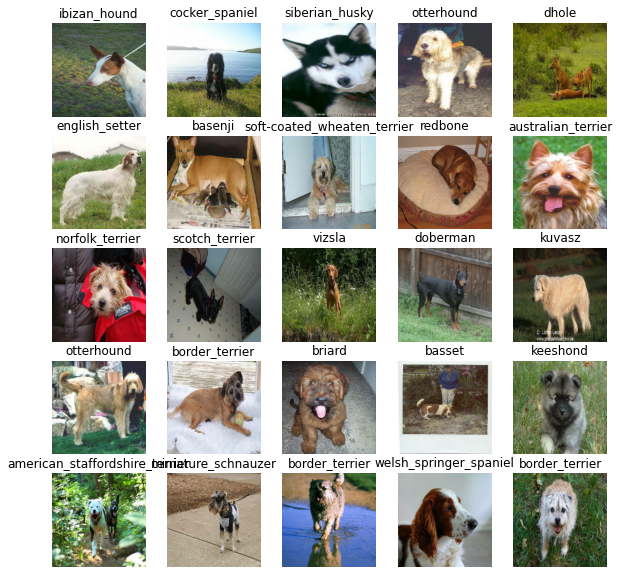

In [32]:
# Visualize training images from the training data batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

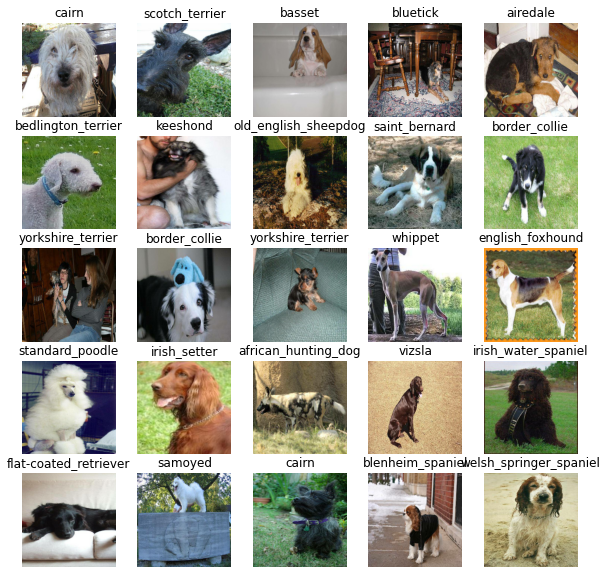

In [33]:
# Visualize validation images from the validation data batch
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a Model

Before we build a model, there are a few things we need to define:

* The input shape (images, in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the model we want to use.

These things will be standard practice with whatever machine learning model you use. And because we're using TensorFlow, everything will be in the form of Tensors.

In [34]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # Batch, height, width, color channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from Tensorflow hub
MODEL_URL = 'https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/classification/5'

Now we've got the inputs, outputs and model we're using ready to go. We can start to put them together

There are many ways of building a model in TensorFlow but one of the best ways to get started is to [use the Keras API](https://www.tensorflow.org/guide/keras/overview).

Defining a deep learning model in Keras can be as straightforward as saying, "here are the layers of the model, the input shape and the output shape, let's go!"

Knowing this, let's create a function which:
* Takes the input shape, output shape and the model we've chosen's URL as parameters.
* Defines the layers in a Keras model in a sequential fashion (do this first, then this, then that).
* Compiles the model (says how it should be evaluated and improved).
* Builds the model (tells it what kind of input shape it'll be getting).
* Returns the model.

We'll take a look at the code first, then dicuss each part.

In [35]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
                               hub.KerasLayer(MODEL_URL),
                               tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                                                     activation="softmax") # Layer 2 (output layer)
  ])
  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )
  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [36]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5508713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,628,953
Trainable params: 120,240
Non-trainable params: 5,508,713
_________________________________________________________________
